In [2]:
# config check
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 85)
training_data (5172, 85)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [3]:
# load in datasets

mnist = io.loadmat("data/mnist_data.mat")
spam = io.loadmat("data/spam_data.mat")
cifar = io.loadmat("data/cifar10_data.mat")

In [4]:
#Question 1 Data Partitioning

# a) mnist shuffle and split

shuffle = np.random.RandomState(seed=123).permutation(len(mnist["training_data"]))
mnist_train_shuffled = mnist["training_data"][shuffle]
mnist_labels_shuffled = mnist["training_labels"][shuffle]

mnist_val_data = mnist_train_shuffled[:10000]
mnist_val_label = mnist_labels_shuffled[:10000]
mnist_train_data = mnist_train_shuffled[10000:]
mnist_train_label = mnist_labels_shuffled[10000:]

# b) spam shuffle and split

shuffle = np.random.RandomState(seed=123).permutation(len(spam["training_data"]))
spam_train_shuffled = spam["training_data"][shuffle]
spam_labels_shuffled = spam["training_labels"][shuffle]

spam_val_data = spam_train_shuffled[:1034]
spam_val_label = spam_labels_shuffled[:1034]
spam_train_data = spam_train_shuffled[1034:]
spam_train_label = spam_labels_shuffled[1034:]

# c) cifar shuffle and split

shuffle = np.random.RandomState(seed=123).permutation(len(cifar["training_data"]))
cifar_train_shuffled = cifar["training_data"][shuffle]
cifar_labels_shuffled = cifar["training_labels"][shuffle]

cifar_val_data = cifar_train_shuffled[:5000]
cifar_val_label = cifar_labels_shuffled[:5000]
cifar_train_data = cifar_train_shuffled[5000:]
cifar_train_label = cifar_labels_shuffled[5000:]

Input Size:  100
Score:  0.7131
Input Size:  200
Score:  0.7756
Input Size:  500
Score:  0.8323
Input Size:  1000
Score:  0.859
Input Size:  2000
Score:  0.8815
Input Size:  5000
Score:  0.8976
Input Size:  10000
Score:  0.9064


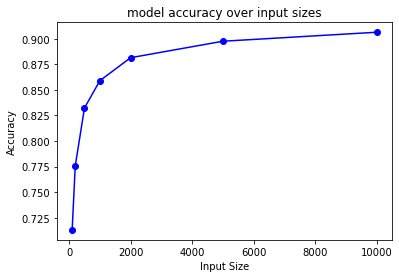

In [5]:
# Question 2 Support Vector Machines: Coding

# 2a) MNIST MODELING

# preprocess data (normalize or standardize)

# method 1: divide by max value
mnist_train_data = mnist_train_data / 255
mnist_val_data = mnist_val_data / 255

# method 2: add a constant and take log
# mnist_train_data = mnist_train_data + 1
# mnist_train_data = np.log(mnist_train_data)
# mnist_val_data = mnist_val_data + 1
# mnist_val_data = np.log(mnist_val_data)

# method 3: Subtract mean and divide by standard deviation
# mnist_train_data = (mnist_train_data - np.mean(mnist_train_data)) / (np.std(mnist_train_data))
# mnist_val_data = (mnist_val_data - np.mean(mnist_val_data)) / (np.std(mnist_val_data))

# method 4: Divide by STD
# mnist_train_data = mnist_train_data / (np.std(mnist_train_data))
# mnist_val_data = mnist_val_data / (np.std(mnist_val_data))

# build model and check accuracy

accuracy_list = []
input_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
lin_svc = LinearSVC(verbose=0, C=.05, random_state= 2)

for size in input_sizes:
    shuff = np.random.RandomState(seed=123).permutation(len(mnist_train_data))
    x_train = mnist_train_data[shuff]
    x_train = x_train[:size]
    y_train = mnist_train_label[shuff]
    y_train = y_train[:size]
    lin_svc.fit(x_train, y_train.ravel())
    y_pred = lin_svc.predict(mnist_val_data)
    y_actual = mnist_val_label
    accuracy = accuracy_score(y_actual, y_pred)
    accuracy_list.append(accuracy)
    print("Input Size: ", size)
    print("Score: ", accuracy)

# plot accuracy scores
x = input_sizes
y = accuracy_list

plt.plot(x, y, marker='o', color='b')
plt.title('model accuracy over input sizes')
plt.xlabel("Input Size")
plt.ylabel("Accuracy")
plt.show()

Input Size:  100
Score:  0.8104448742746615
Input Size:  200
Score:  0.8375241779497099
Input Size:  500
Score:  0.8423597678916828
Input Size:  1000
Score:  0.8558994197292069
Input Size:  2000
Score:  0.8655705996131529
Input Size:  4138
Score:  0.8713733075435203


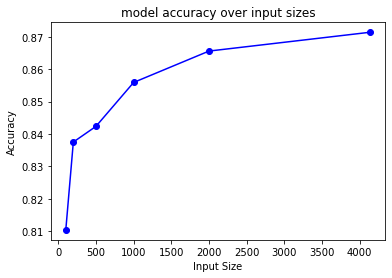

In [6]:
#2b SPAM MODELING

# preprocess data (normalize or standardize)

# method 1: divide by max value

# spam_train_data = spam_train_data / 980
# spam_val_data = spam_val_data / 980

# method 2: add a constant and take log

spam_train_data = spam_train_data + 1
spam_train_data = np.log(spam_train_data)
spam_val_data = spam_val_data + 1
spam_val_data = np.log(spam_val_data)

# # method 3: Subtract mean and divide by standard deviation
# spam_train_data = (spam_train_data - np.mean(spam_train_data)) / (np.std(spam_train_data))
# spam_val_data = (spam_val_data - np.mean(spam_val_data)) / (np.std(spam_val_data))

# method 4: Divide by STD
# spam_train_data = spam_train_data / (np.std(spam_train_data))
# spam_val_data = spam_val_data / (np.std(spam_val_data))


# build model and check accuracy

accuracy_list = []
input_sizes = [100, 200, 500, 1000, 2000, len(spam_train_data)]
lin_svc = LinearSVC(verbose=0, C=.1, random_state= 2, max_iter=1500)

for size in input_sizes:
    shuff = np.random.RandomState(seed=123).permutation(len(spam_train_data))
    x_train = spam_train_data[shuff]
    x_train = x_train[:size]
    y_train = spam_train_label[shuff]
    y_train = y_train[:size]
    lin_svc.fit(x_train, y_train.ravel())
    y_pred = lin_svc.predict(spam_val_data)
    y_actual = spam_val_label
    accuracy = accuracy_score(y_actual, y_pred)
    accuracy_list.append(accuracy)
    print("Input Size: ", size)
    print("Score: ", accuracy)

# plot accuracy scores
x = input_sizes
y = accuracy_list

plt.plot(x, y, marker='o', color='b')
plt.title('model accuracy over input sizes')
plt.xlabel("Input Size")
plt.ylabel("Accuracy")
plt.show()

Input Size:  100
Score:  0.2544
Input Size:  200
Score:  0.2612
Input Size:  500
Score:  0.2962
Input Size:  1000
Score:  0.311
Input Size:  2000
Score:  0.3296
Input Size:  5000
Score:  0.3538


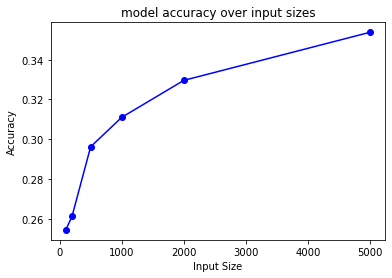

In [7]:
#2c CIFAR MODELING

# preprocess data (normalize or standardize)

# Method 1: divide by max value
cifar_train_data = cifar_train_data / 255
cifar_val_data = cifar_val_data / 255

# method 2: add a constant and take log

# cifar_train_data = cifar_train_data + 1
# cifar_train_data = np.log(cifar_train_data)
# cifar_val_data = cifar_val_data + 1
# cifar_val_data = np.log(cifar_val_data)

# method 3: Subtract mean and divide by standard deviation
# cifar_train_data = (cifar_train_data - np.mean(cifar_train_data)) / (np.std(cifar_train_data))
# cifar_val_data = (cifar_val_data - np.mean(cifar_val_data)) / (np.std(cifar_val_data))

# method 4: Divide by STD
# cifar_train_data = cifar_train_data / (np.std(cifar_train_data))
# cifar_val_data = cifar_val_data / (np.std(cifar_val_data))


# build model and check accuracy

accuracy_list = []
input_sizes = [100, 200, 500, 1000, 2000, 5000]
lin_svc = LinearSVC(verbose=0, C=.007, random_state= 2)

for size in input_sizes:
    shuff = np.random.RandomState(seed=123).permutation(len(cifar_train_data))
    x_train = cifar_train_data[shuff]
    x_train = x_train[:size]
    y_train = cifar_train_label[shuff]
    y_train = y_train[:size]
    lin_svc.fit(x_train, y_train.ravel())
    y_pred = lin_svc.predict(cifar_val_data)
    y_actual = cifar_val_label
    accuracy = accuracy_score(y_actual, y_pred)
    accuracy_list.append(accuracy)
    print("Input Size: ", size)
    print("Score: ", accuracy)

# plot accuracy scores
x = input_sizes
y = accuracy_list

plt.plot(x, y, marker='o', color='b')
plt.title('model accuracy over input sizes')
plt.xlabel("Input Size")
plt.ylabel("Accuracy")
plt.show()

/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Parameter C Size:  1
Score:  0.8932


/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Parameter C Size:  0.5
Score:  0.8966
Parameter C Size:  0.1
Score:  0.9042
Parameter C Size:  0.05
Score:  0.9064
Parameter C Size:  0.01
Score:  0.9055
Parameter C Size:  0.005
Score:  0.9017
Parameter C Size:  0.001
Score:  0.8885
Parameter C Size:  0.0005
Score:  0.8787
Parameter C Size:  0.0001
Score:  0.8442
Parameter C Size:  5e-05
Score:  0.823
Parameter C Size:  1e-05
Score:  0.7741
Parameter C Size:  5e-06
Score:  0.7575
Parameter C Size:  1e-06
Score:  0.7211
Parameter C Size:  5e-07
Score:  0.6967
Parameter C Size:  1e-07
Score:  0.652


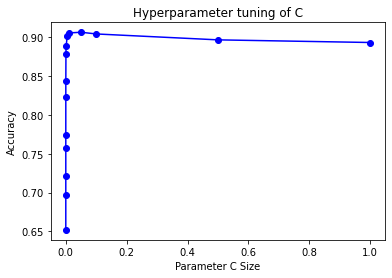

In [8]:
#Question 3 Hyperparameter Tuning

# check accuracy iterating through different C parameter values

C_inputs = [1, .5, .1, .05, .01, .005, .001, .0005, .0001, .00005, .00001, .000005, .000001, .0000005, .0000001]
accuracy_list = []

for c_val in C_inputs:
    lin_svc = LinearSVC(verbose=0, C = c_val, random_state= 2)
    shuff = np.random.RandomState(seed=123).permutation(len(mnist_train_data))
    x_train = mnist_train_data[shuff]
    x_train = x_train[:10000]
    y_train = mnist_train_label[shuff]
    y_train = y_train[:10000]
    lin_svc.fit(x_train, y_train.ravel())
    y_pred = lin_svc.predict(mnist_val_data)
    y_actual = mnist_val_label
    accuracy = accuracy_score(y_actual, y_pred)
    accuracy_list.append(accuracy)
    print("Parameter C Size: ", c_val)
    print("Score: ", accuracy)

# plot accuracy scores
x = C_inputs
y = accuracy_list

plt.plot(x, y, marker='o', color='b')
plt.title('Hyperparameter tuning of C')
plt.xlabel("Parameter C Size")
plt.ylabel("Accuracy")
plt.show()

/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, inc

Parameter C Size:  10
Score:  0.8685122812782387


/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, inc

Parameter C Size:  1
Score:  0.8671586894991149
Parameter C Size:  0.5
Score:  0.8656120475269413
Parameter C Size:  0.1
Score:  0.8611655452080985
Parameter C Size:  0.05
Score:  0.8607794448219981
Parameter C Size:  0.01
Score:  0.8474354570099252
Parameter C Size:  0.005
Score:  0.8395050895050895
Parameter C Size:  0.001
Score:  0.8095333935759468
Parameter C Size:  0.0005
Score:  0.7888478973585357
Parameter C Size:  0.0001
Score:  0.7236891630508653
Parameter C Size:  5e-05
Score:  0.7101566059012868
Parameter C Size:  1e-05
Score:  0.7099631823036079
Parameter C Size:  5e-06
Score:  0.7099631823036079
Parameter C Size:  1e-06
Score:  0.7099631823036079
Parameter C Size:  5e-07
Score:  0.7099631823036079
Parameter C Size:  1e-07
Score:  0.7099631823036079


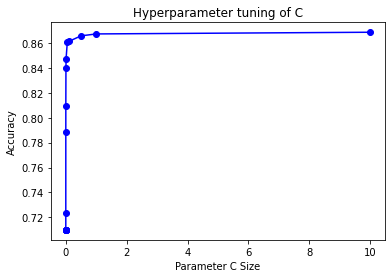

In [9]:
# Question 4 K-Fold Cross-Validation

# shuffle data and normalize
shuffle = np.random.RandomState(seed=123).permutation(len(spam["training_data"]))
spam_train_shuf = spam["training_data"][shuffle]
spam_labels_shuf = spam["training_labels"][shuffle]

spam_train_shuf = spam_train_shuf + 1
spam_train_shuf = np.log(spam_train_shuf)

# Perform 5 fold cross validation on spam dataset, iterating through values of C hyperparameter.
# Keep track of associated accuracies with C values
k_range = np.arange(1,6,1)
C_inputs = [10, 1, .5, .1, .05, .01, .005, .001, .0005, .0001, .00005, .00001, .000005, .000001, .0000005, .0000001]
avg_accs = []

#loop through values of C
for c_val in C_inputs:
    one_fifth = len(spam_train_shuf)//5
    start = 0
    end = one_fifth
    accuracy_list = []
# running k-fold on a given value of C parameter
    for k in k_range:
        if k < 5:
            validation = spam_train_shuf[start:end]
            x_train = np.concatenate((spam_train_shuf[end:], spam_train_shuf[:start]))
            y_actual = spam_labels_shuf[start:end]
            y_train = np.concatenate((spam_labels_shuf[end:], spam_labels_shuf[:start]))
            start += one_fifth
            end += one_fifth
        else:
            validation = spam_train_shuf[start:]
            x_train = spam_train_shuf[:start]
            y_actual = spam_labels_shuf[start:]
            y_train = spam_labels_shuf[:start]

        lin_svc = LinearSVC(verbose=0, C = c_val, random_state= 2, max_iter=3000)
        lin_svc.fit(x_train, y_train.ravel())
        y_pred = lin_svc.predict(validation)
        accuracy = accuracy_score(y_actual, y_pred)
        accuracy_list.append(accuracy)
        if k==5:
            avg_accuracy = sum(accuracy_list)/k
            avg_accs.append(avg_accuracy)
            print("Parameter C Size: ", c_val)
            print("Score: ", avg_accuracy)

# plot accuracy scores
x = C_inputs
y = avg_accs

plt.plot(x, y, marker='o', color='b')
plt.title('Hyperparameter tuning of C')
plt.xlabel("Parameter C Size")
plt.ylabel("Accuracy")
plt.show()    

In [10]:
# Question 5 Optimize models and run on test sets

In [11]:
#mnist digit classifier:
#Method: Initially, try many gridsearch inputs and then fine tune the "Best params" outputted

#Select mnist data and normalize
x_train = mnist["training_data"][:100]
y_train = mnist["training_labels"][:100]
x_train = x_train / 255

#Grid search SVC

# untuned_params = {'C': [0.000001,.00001, 0.0001,0.001,0.01,0.1,1],
#           'gamma': [1,0.1,0.01,0.001,0.0001],
#           'kernel': ["linear", "poly", "rbf", "sigmoid"]}

params = {'C': [2.673,2.674],
          'gamma': [.0281,.02800],
          'kernel': ["rbf"]}
svc_gs = GridSearchCV(SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
svc_gs.fit(x_train, y_train.ravel())

print("Best params:", svc_gs.best_params_)
print(svc_gs.score(x_train, y_train))

Best params: {'C': 2.673, 'gamma': 0.0281, 'kernel': 'rbf'}
1.0


In [12]:
# Run optimized model on test set (make predictions)
x_test = mnist["test_data"]
x_train = mnist["training_data"]
y_train = mnist["training_labels"]

# normalize full dataset
x_train = x_train / 255
x_test = x_test / 255

# run best model on test set
svc = SVC(C= 2.7, gamma= 0.027, kernel= 'rbf')
svc.fit(x_train, y_train.ravel())
y_test = svc.predict(x_test)
y_test

array([8, 8, 8, ..., 9, 2, 7], dtype=uint8)

In [13]:
#Download csv format for submission to kaggle
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('mnist_submission5.0.csv', index_label='Id')
results_to_csv(y_test)    

In [14]:
#spam/ham email binary classifier
#Method: Initially, try many gridsearch inputs and then fine tune the "Best params" outputted

#Select spam data and normalize
x_train = spam["training_data"]
y_train = spam["training_labels"]

#Grid search SVC

# untuned_params = {'C': [0.000001,.00001, 0.0001,0.001,0.01,0.1,1],
#           'gamma': [1,0.1,0.01,0.001,0.0001],
#           'kernel': ["linear", "poly", "rbf", "sigmoid"]}

params = {'C': [1.75],
          'gamma': [.75],
          'kernel': ["rbf"]}
svc_gs = GridSearchCV(SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
svc_gs.fit(x_train, y_train.ravel())

print("Best params:", svc_gs.best_params_)
print(svc_gs.score(x_train, y_train))

Best params: {'C': 1.75, 'gamma': 0.75, 'kernel': 'rbf'}
0.998646558391338


In [15]:
# # Run optimized model on test set (make predictions)
x_test = spam["test_data"]
x_train = spam_train_shuffled
y_train = spam_labels_shuffled

# normalize full dataset
x_train = x_train + 1
x_train = np.log(x_train)
x_test = x_test + 1
x_test = np.log(x_test)

# run best model on test set
svc = SVC(C=1.75, gamma=.75, kernel='rbf')
svc.fit(x_train, y_train.ravel())
y_test = svc.predict(x_test)
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
#Download csv format for submission to kaggle
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('spam_submission9.csv', index_label='Id')
results_to_csv(y_test)    

In [17]:
#cifar image classifier
#Method: Initially, try many gridsearch inputs and then fine tune the "Best params" outputted

#Select cifar data and normalize
x_train = cifar["training_data"][:100]
y_train = cifar["training_labels"][:100]
x_train = x_train / 255

#Grid search SVC

# untuned_params = {'C': [0.000001,.00001, 0.0001,0.001,0.01,0.1,1],
#           'gamma': [1,0.1,0.01,0.001,0.0001],
#           'kernel': ["linear", "poly", "rbf", "sigmoid"]}

params = {'C': [2.5,2.7,2.3],
          'gamma': [.001,.005,.01],
          'kernel': ["rbf"]}
svc_gs = GridSearchCV(SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
svc_gs.fit(x_train, y_train.ravel())

print("Best params:", svc_gs.best_params_)
print(svc_gs.score(x_train, y_train))

Best params: {'C': 2.7, 'gamma': 0.005, 'kernel': 'rbf'}
1.0


In [18]:
# run optimized model on test set (make predictions)
x_test = cifar["test_data"]
x_train = cifar_train_shuffled
y_train = cifar_labels_shuffled

# normalize full dataset
x_train = x_train/ 255
x_test = x_test / 255

# run best model on test set
svc = SVC(C=2.5, gamma=.005, kernel="rbf")
svc.fit(x_train, y_train.ravel())
y_test = svc.predict(x_test)
y_test

array([9, 0, 7, ..., 6, 1, 3])

In [19]:
#Download csv format for submission to kaggle
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('cifar_submission4.csv', index_label='Id')
results_to_csv(y_test)    

In [23]:
spam['training_labels']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    